# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import sys
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
#import time (unused in my analysis)
from scipy.stats import linregress

# Import API key
sys.path.insert(0,r'c:\Users\Owen\Desktop\DSV\_HW_Repos\python-api-challenge\common')
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
haveEnoughCities = False

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
  
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cityObjs = []
i = -1
for city in cities:
    i += 1
    try:
        #try to reach api with requests.get()
        print(f'processing: {i}. {city}')
        owdResult = requests.get(f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial')
    except:
        #error in reaching api
        print('Request aborted. Request Denied')
    
    if owdResult.status_code == 200:
        #verify that return object is proper
        print('complete')
        cityObjs.append(owdResult.json())
    else:
        #error in return object type
        print(f'Request aborted. Status Code: {owdResult.status_code}')

complete
processing: 76. carnarvon
complete
processing: 77. salalah
complete
processing: 78. grand river south east
Request aborted. Status Code: 404
processing: 79. bulawayo
complete
processing: 80. tessalit
complete
processing: 81. castro
complete
processing: 82. tongliao
complete
processing: 83. kaitangata
complete
processing: 84. touba
complete
processing: 85. hilo
complete
processing: 86. vuktyl
complete
processing: 87. samarai
complete
processing: 88. soyo
complete
processing: 89. maceio
complete
processing: 90. butaritari
complete
processing: 91. touros
complete
processing: 92. nizwa
complete
processing: 93. yilan
complete
processing: 94. souillac
complete
processing: 95. hasanabad
complete
processing: 96. lavrentiya
complete
processing: 97. palmas bellas
complete
processing: 98. hasaki
complete
processing: 99. escarcega
complete
processing: 100. jakar
complete
processing: 101. anloga
complete
processing: 102. balkhash
complete
processing: 103. bat khela
complete
processing: 104

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
#Write city weather data to DataFrame
cityDataDict = {}

#write json data to dataframe row by row
for cityObj in cityObjs:
    # get column data per city from json
    cityID = cityObj['id']
    cityName = cityObj['name']
    cityCountryCode = cityObj['sys']['country']
    cityLat = cityObj['coord']['lat']
    cityLng = cityObj['coord']['lon']
    cityMaxTemp = cityObj['main']['temp_max']
    cityHum = cityObj['main']['humidity']
    cityCloud = cityObj['clouds']['all']
    cityWindSpeed = cityObj['wind']['speed']
    cityDate = cityObj['dt']
    #write column data to dictionary
    cityDictEntry = {
                    'city_name': cityName,
                    'lat': cityLat, 
                    'lng': cityLng,
                    'max_temp': cityMaxTemp,
                    'hum': cityHum,
                    'cloud': cityCloud,
                    'wind_speed': cityWindSpeed,
                    'country_code': cityCountryCode,
                    'date': cityDate 
                    }
    #write dictionary to Dataframe
    cityDataDict[cityID] = cityDictEntry
#transpose data to show data columns and city rows
city_data = pd.DataFrame(cityDataDict).transpose()

#Write city weather data to csv
city_data.to_csv(output_data_file, index = False)
city_data.head()


,city_name,lat,lng,max_temp,hum,cloud,wind_speed,country_code,date
696483,Porohy,48.69,24.26,37.4,93,0,5.3,UA,1603219784
7671223,Kloulklubed,7.04,134.26,75.2,94,90,8.05,PW,1603219784
2163355,Hobart,-42.88,147.33,53.6,81,90,2.57,AU,1603219209
3443061,Chui,-33.7,-53.46,55.24,82,100,15.64,UY,1603219784
4030556,Rikitea,-23.12,-134.97,73.33,79,0,14.65,PF,1603219145


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#retain only rows where humidity is less than or equal to 100
city_data = city_data[city_data['hum'] <= 100]


In [6]:
#  Get the indices of cities that have humidity over 100%.
humIndices = city_data[city_data['hum'] > 100].index
humIndices

Int64Index([], dtype='int64')

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data[~city_data['hum'].isin(humIndices)]
clean_city_data

,city_name,lat,lng,max_temp,hum,cloud,wind_speed,country_code,date
696483,Porohy,48.69,24.26,37.4,93,0,5.3,UA,1603219784
7671223,Kloulklubed,7.04,134.26,75.2,94,90,8.05,PW,1603219784
2163355,Hobart,-42.88,147.33,53.6,81,90,2.57,AU,1603219209
3443061,Chui,-33.7,-53.46,55.24,82,100,15.64,UY,1603219784
4030556,Rikitea,-23.12,-134.97,73.33,79,0,14.65,PF,1603219145
...,...,...,...,...,...,...,...,...,...
1056899,Sambava,-14.27,50.17,75.63,81,100,15.52,MG,1603219513
1791779,Wanning,18.8,110.4,71.98,87,56,11.59,CN,1603219495
3983805,Santa Rosalía,27.32,-112.28,88.25,34,0,6.46,MX,1603219883
365742,Torit,4.41,32.57,73.49,87,100,2.8,SS,1603219884


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

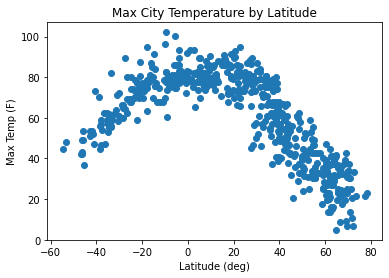

In [22]:
#plot latitude vs. max temp with formatting
plt.scatter(clean_city_data['lat'].values, clean_city_data['max_temp'].values)
plt.title('Max City Temperature by Latitude')
plt.xlabel('Latitude (deg)')
plt.ylabel('Max Temp (F)')
plt.savefig('../output_data/LatTemp')

#Analysis
#The maximum temperature decreases as the latitude of the city moves further from 0 degrees (equator) from near 100F to near 0F

## Latitude vs. Humidity Plot

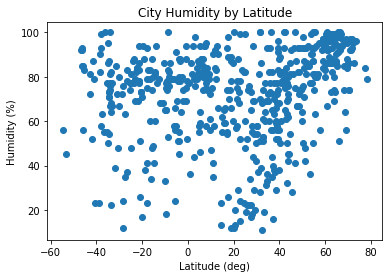

In [23]:
#plot latitude vs. humidity with formatting
plt.scatter(clean_city_data['lat'].values, clean_city_data['hum'].values)
plt.title('City Humidity by Latitude')
plt.xlabel('Latitude (deg)')
plt.ylabel('Humidity (%)')
plt.savefig('../output_data/LatHum')

#Analysis
#The humidity does not show a strong relationship to the latitude of the city for most of the latitude range. Cities with the highest latitude show high humidity values. 

## Latitude vs. Cloudiness Plot

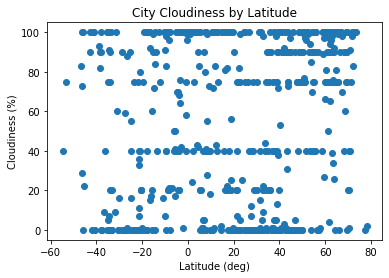

In [24]:
#plot latitude vs. cloudiness with formatting
plt.scatter(clean_city_data['lat'].values, clean_city_data['cloud'].values)
plt.title('City Cloudiness by Latitude')
plt.xlabel('Latitude (deg)')
plt.ylabel('Cloudiness (%)')
plt.savefig('../output_data/LatCloud')

#Analysis
#The cloudiness does not show a significant relationship to the latitude of the city

## Latitude vs. Wind Speed Plot

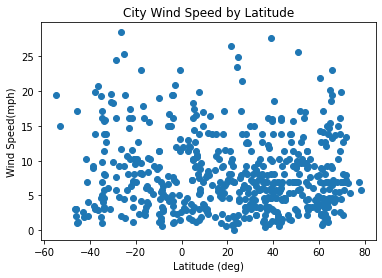

In [25]:
#plot latitude vs. wind speed with formatting
plt.scatter(clean_city_data['lat'].values, clean_city_data['wind_speed'].values)
plt.title('City Wind Speed by Latitude')
plt.xlabel('Latitude (deg)')
plt.ylabel('Wind Speed(mph)')
plt.savefig('../output_data/LatWind')

#Analysis
#The wind speed does not show a significant relationship to the latitude of the city. Most of the wind speeds are recorded below 10 mph but winds speeds near 30 mph have been recorded

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.89


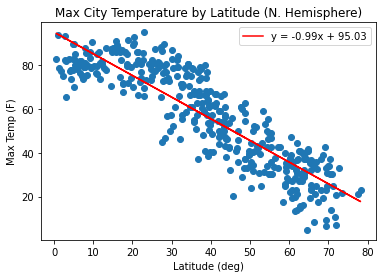

In [26]:
#create city data subset with only northern hempsphere cities
clean_city_data_n = clean_city_data[clean_city_data['lat'] > 0]

#plot latitude vs. max temp with formatting
plt.scatter(clean_city_data_n['lat'].values, clean_city_data_n['max_temp'].values)
plt.title('Max City Temperature by Latitude (N. Hemisphere)')
plt.xlabel('Latitude (deg)')
plt.ylabel('Max Temp (F)')

#get regression data, print r-value
x = clean_city_data_n['lat'].values.tolist()
y = clean_city_data_n['max_temp'].values.tolist()
m, b, r, p, e = linregress(x, y)
print(f'The r-value is: {round(r,2)}')

#create y-vals for regression line, label and plot
yLine = [round(m*i+b,2) for i in x]
plt.plot(x, yLine, 'r', label = f'y = {round(m,2)}x + {round(b,2)}')
plt.legend()
plt.savefig('../output_data/NLatTempRegress')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.82


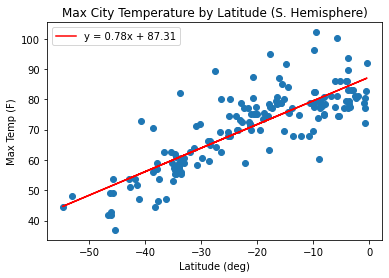

In [27]:
#create city data subset with only southern hempsphere cities
clean_city_data_s = clean_city_data[clean_city_data['lat'] < 0]

#plot latitude vs. max temp with formatting
plt.scatter(clean_city_data_s['lat'].values, clean_city_data_s['max_temp'].values)
plt.title('Max City Temperature by Latitude (S. Hemisphere)')
plt.xlabel('Latitude (deg)')
plt.ylabel('Max Temp (F)')

#get regression data, print r-value
x = clean_city_data_s['lat'].values.tolist()
y = clean_city_data_s['max_temp'].values.tolist()
m, b, r, p, e = linregress(x, y)
print(f'The r-value is: {round(r,2)}')

#create y-vals for regression line, label and plot
yLine = [round(m*i+b,2) for i in x]
plt.plot(x, yLine, 'r', label = f'y = {round(m,2)}x + {round(b,2)}')
plt.legend()
plt.savefig('../output_data/SLatTempRegress')

In [ ]:
#Analysis
#In the northern hemisphere, the maximum temperature decreases as the latitude of the city increases
#In the southern hemisphere, the maximum temperature increases as the latitude of the city increases
#both hemispheres show a reduction in temperature as the latitude move away from zero
#the absolute value of r-values of each trend is greater than 0.8, showing a strong correlation relative to other data sets (humidity, wind-speed, cloudiness)
#this is expected because cities near the equator generally record warmer temperatures

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.35


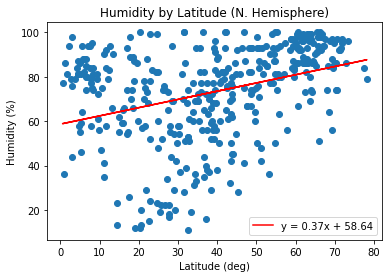

In [28]:
#create city data subset with only northern hempsphere cities
clean_city_data_n = clean_city_data[clean_city_data['lat'] > 0]

#plot latitude vs. humidity with formatting
plt.scatter(clean_city_data_n['lat'].values, clean_city_data_n['hum'].values)
plt.title('Humidity by Latitude (N. Hemisphere)')
plt.xlabel('Latitude (deg)')
plt.ylabel('Humidity (%)')

#get regression data, print r-value
x = clean_city_data_n['lat'].values.tolist()
y = clean_city_data_n['hum'].values.tolist()
m, b, r, p, e = linregress(x, y)
print(f'The r-value is: {round(r,2)}')

#create y-vals for regression line, label and plot
yLine = [round(m*i+b,2) for i in x]
plt.plot(x, yLine, 'r', label = f'y = {round(m,2)}x + {round(b,2)}')
plt.legend()
plt.savefig('../output_data/NLatHumRegress')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.0


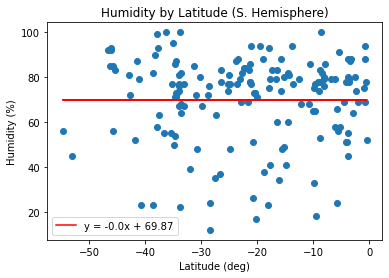

In [29]:
#create city data subset with only southern hempsphere cities
clean_city_data_s = clean_city_data[clean_city_data['lat'] < 0]

#plot latitude vs. humidity with formatting
plt.scatter(clean_city_data_s['lat'].values, clean_city_data_s['hum'].values)
plt.title('Humidity by Latitude (S. Hemisphere)')
plt.xlabel('Latitude (deg)')
plt.ylabel('Humidity (%)')

#get regression data, print r-value
x = clean_city_data_s['lat'].values.tolist()
y = clean_city_data_s['hum'].values.tolist()
m, b, r, p, e = linregress(x, y)
print(f'The r-value is: {round(r,2)}')

#create y-vals for regression line, label and plot
yLine = [round(m*i+b,2) for i in x]
plt.plot(x, yLine, 'r', label = f'y = {round(m,2)}x + {round(b,2)}')
plt.legend()
plt.savefig('../output_data/SLatHumRegress')

In [ ]:
#Analysis
#In the northern hemisphere, the humidity increases as the latitude of the city increases. The r-value is low so the correlation is not strong.
#In the southern hemisphere, the humidity and latitude of the city show no visible relationship. The r-value is low so the correlation is not strong.
#this is expected because city latitudes are not known to strongly affect humidities

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.24


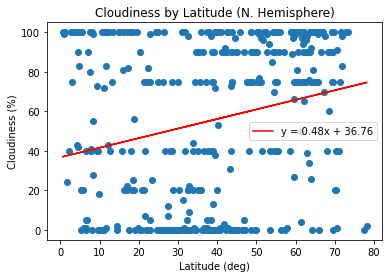

In [30]:
#create city data subset with only northern hempsphere cities
clean_city_data_n = clean_city_data[clean_city_data['lat'] > 0]

#plot latitude vs. cloudiness with formatting
plt.scatter(clean_city_data_n['lat'].values, clean_city_data_n['cloud'].values)
plt.title('Cloudiness by Latitude (N. Hemisphere)')
plt.xlabel('Latitude (deg)')
plt.ylabel('Cloudiness (%)')

#get regression data, print r-value
x = clean_city_data_n['lat'].values.tolist()
y = clean_city_data_n['cloud'].values.tolist()
m, b, r, p, e = linregress(x, y)
print(f'The r-value is: {round(r,2)}')

#create y-vals for regression line, label and plot
yLine = [round(m*i+b,2) for i in x]
plt.plot(x, yLine, 'r', label = f'y = {round(m,2)}x + {round(b,2)}')
plt.legend()
plt.savefig('../output_data/NLatCloudRegress')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.13


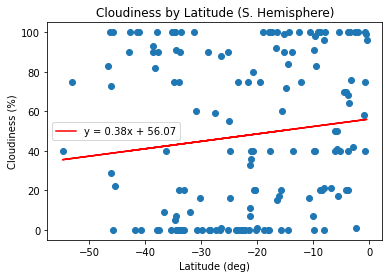

In [31]:
#create city data subset with only southern hempsphere cities
clean_city_data_s = clean_city_data[clean_city_data['lat'] < 0]

#plot latitude vs. cloudiness with formatting
plt.scatter(clean_city_data_s['lat'].values, clean_city_data_s['cloud'].values)
plt.title('Cloudiness by Latitude (S. Hemisphere)')
plt.xlabel('Latitude (deg)')
plt.ylabel('Cloudiness (%)')

#get regression data, print r-value
x = clean_city_data_s['lat'].values.tolist()
y = clean_city_data_s['cloud'].values.tolist()
m, b, r, p, e = linregress(x, y)
print(f'The r-value is: {round(r,2)}')

#create y-vals for regression line, label and plot
yLine = [round(m*i+b,2) for i in x]
plt.plot(x, yLine, 'r', label = f'y = {round(m,2)}x + {round(b,2)}')
plt.legend()
plt.savefig('../output_data/SLatCloudRegress')

In [ ]:
#Analysis
#In the northern hemisphere, the cloudiness increases as the latitude of the city increases. The r-value is low so the correlation is not strong.
#In the southern hemisphere, the cloudiness increases as the latitude of the city increases. The r-value is low so the correlation is not strong.
#this is expected because city latitudes are not known to strongly affect cloudiness

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.01


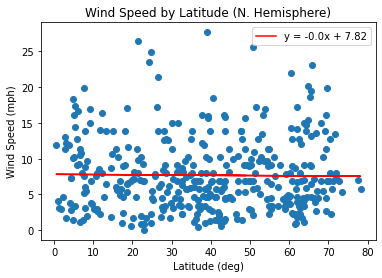

In [32]:
#create city data subset with only northern hempsphere cities
clean_city_data_n = clean_city_data[clean_city_data['lat'] > 0]

#plot latitude vs. wind speed with formatting
plt.scatter(clean_city_data_n['lat'].values, clean_city_data_n['wind_speed'].values)
plt.title('Wind Speed by Latitude (N. Hemisphere)')
plt.xlabel('Latitude (deg)')
plt.ylabel('Wind Speed (mph)')

#get regression data, print r-value
x = clean_city_data_n['lat'].values.tolist()
y = clean_city_data_n['wind_speed'].values.tolist()
m, b, r, p, e = linregress(x, y)
print(f'The r-value is: {round(r,2)}')

#create y-vals for regression line, label and plot
yLine = [round(m*i+b,2) for i in x]
plt.plot(x, yLine, 'r', label = f'y = {round(m,2)}x + {round(b,2)}')
plt.legend()
plt.savefig('../output_data/NLatWindRegress')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.04


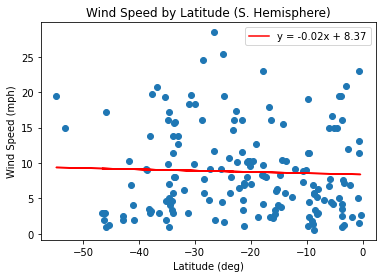

In [33]:
#create city data subset with only southern hempsphere cities
clean_city_data_s = clean_city_data[clean_city_data['lat'] < 0]

#plot latitude vs. wind speed with formatting
plt.scatter(clean_city_data_s['lat'].values, clean_city_data_s['wind_speed'].values)
plt.title('Wind Speed by Latitude (S. Hemisphere)')
plt.xlabel('Latitude (deg)')
plt.ylabel('Wind Speed (mph)')

#get regression data, print r-value
x = clean_city_data_s['lat'].values.tolist()
y = clean_city_data_s['wind_speed'].values.tolist()
m, b, r, p, e = linregress(x, y)
print(f'The r-value is: {round(r,2)}')

#create y-vals for regression line, label and plot
yLine = [round(m*i+b,2) for i in x]
plt.plot(x, yLine, 'r', label = f'y = {round(m,2)}x + {round(b,2)}')
plt.legend()
plt.savefig('../output_data/SLatWindRegress')

In [ ]:
#Analysis
#In the northern hemisphere, the wind speed and latitude of the city show no visible relationship. The r-value is low so the correlation is not strong.
#In the southern hemisphere, the wind speed and latitude of the city show no visible relationship. The r-value is low so the correlation is not strong.
#this is expected because city latitudes are not known to strongly affect wind speed